In [1]:
import os
import sys

# Go up one directory level to reach root
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

# Add root to Python path
sys.path.insert(0, root_dir)

print(f"Current working directory: {os.getcwd()}")
print(f"Root directory added to path: {root_dir}")

Current working directory: /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui
Root directory added to path: /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui


In [2]:
%load_ext autoreload
%autoreload 2
from functions._utils_ import *

labels = ["benign", "cancer"]

### DATASET SETUP (IModPoly)

In [3]:
chumDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "chum_benign.pkl"
))

chumDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "chum_cancer.pkl"
))

In [4]:
uhnDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "uhn_benign.pkl"
))

uhnDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "uhn_cancer.pkl"
))

In [5]:
chuqDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "chuq_benign.pkl"
))

chuqDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "IModPoly",
    "chuq_cancer.pkl"
))

In [6]:
cancer_spectra = [(uhnDF_cancer, "uhndf-cancer"),
                  (chuqDF_cancer, "chuqdf-cancer")]
benign_spectra = [(chuqDF_benign, "chuqdf-benign"),
                  (uhnDF_benign, "uhndf-benign")]
labels_spectra = [k[1] for k in cancer_spectra + benign_spectra]
test_spectra = [k[0]["processed"] for k in cancer_spectra + benign_spectra]
true_labels = []
for k in cancer_spectra + benign_spectra:
    true_labels.extend(k[0]["labels"])
    
sample_indices = [15, 2565, 2581, 315]  # [1538, 2565, 2678, 315]
region = (600, 1600)

### TESTING WITH CalibratedClassifierCV SVC LINEAR MODEL (IModPoly)

In [7]:

cccv_svc_linear_path = os.path.join(
    CURRENT_DIR,
    "models",
    "CCCV-SVC-LINEAR",
    "CCCV-SVC-LINEAR_raman_prostate_model"
)

cccv_svc_linear_model = MLModel(
    onnx_path=f"{cccv_svc_linear_path}.onnx",
    meta_path=f"{cccv_svc_linear_path}.json",
    pickle_path=f"{cccv_svc_linear_path}.pkl",
    region=region
)

2025-06-12 04:06:23,538 - load_onnx - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model.onnx and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model.json
2025-06-12 04:06:24,150 - pickle_load - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model.pkl and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model.json


In [8]:
cccv_svc_linear_get_predictions = cccv_svc_linear_model.predict(
    test_spectra=test_spectra,
    true_labels=true_labels,
    use_onnx=False,
)

'Interpolating spectra from 41145 to 24552 features'
'Interpolating spectra from 40380 to 24552 features'
'Interpolating spectra from 4475 to 24552 features'
'Interpolating spectra from 5370 to 24552 features'
'Predicting all 2736 samples'
'Predicting 2736 samples with 24552 features using sklearn'


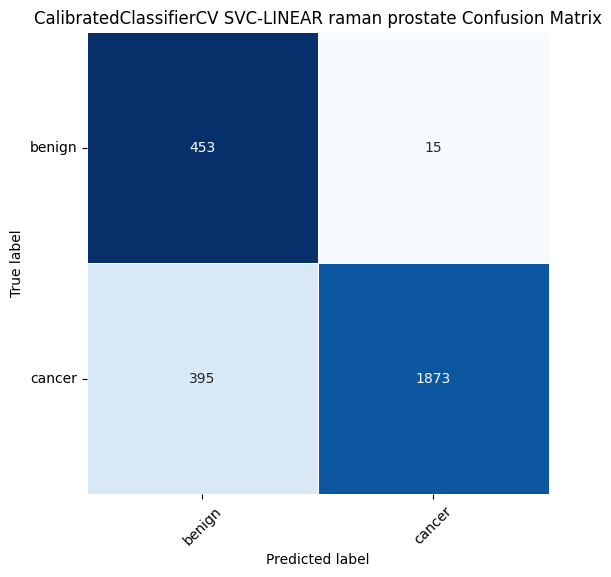

'Predict Accuracy:'
'====================================='
'benign: 96.79%'
'cancer: 82.58%'


In [9]:
visual_cccv_svc_linear = RamanVisualizer(ML_PROPERTY=cccv_svc_linear_model)

predict_accuracy, plotdata = visual_cccv_svc_linear.confusion_matrix_heatmap(
    y_true=cccv_svc_linear_model.y_true,          # true labels for test set
    y_pred=cccv_svc_linear_model.y_pred,  # predicted labels for test set
    class_labels=labels,    # class names, e.g. ["benign", "cancer"]
    title=f"{cccv_svc_linear_model._name} Confusion Matrix",
    normalize=False,
    cmap="Blues",
    figsize=(8, 6),
    fmt="d",
)

console_log("Predict Accuracy:")
console_log("=====================================")
for i, (label, percentage) in enumerate(predict_accuracy.items()):
    console_log(f"{label}: {percentage:.2f}%")

'Sample indices for inspection: [15, 2565, 2581, 315]'
'Using MLModel with model type: CalibratedClassifierCV'
'📊 Using provided test_spectra and true_labels'
'Inspecting 4 spectra...'
'\nAnalyzing spectrum 1/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
"💡 Performance Tip: You're using 'full' mode for complete SHAP values."
'    This may take longer but gives the most detailed explanations.'
"    Consider using fast_mode=True or shap_output_mode='sparse' for speed."
🔧 Enhanced model type detection...
📋 Detected CalibratedClassifierCV - analyzing base estimator...
⚠️ Could not extract base estimator, using KernelExplainer
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - SHAP strategy: kernel_fallback
   - SHAP model: CalibratedClassifierCV
   - Output mode: full
⚡ Enhanced data optimization...
📊 Optimized data: Background=50, Test=1, Features=24552
'🔬 Computing SHAP va

  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(


📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ Enhanced SHAP explanation completed in 46.19 seconds!'
'    Strategy used: kernel_fallback'
'    Output mode: full'


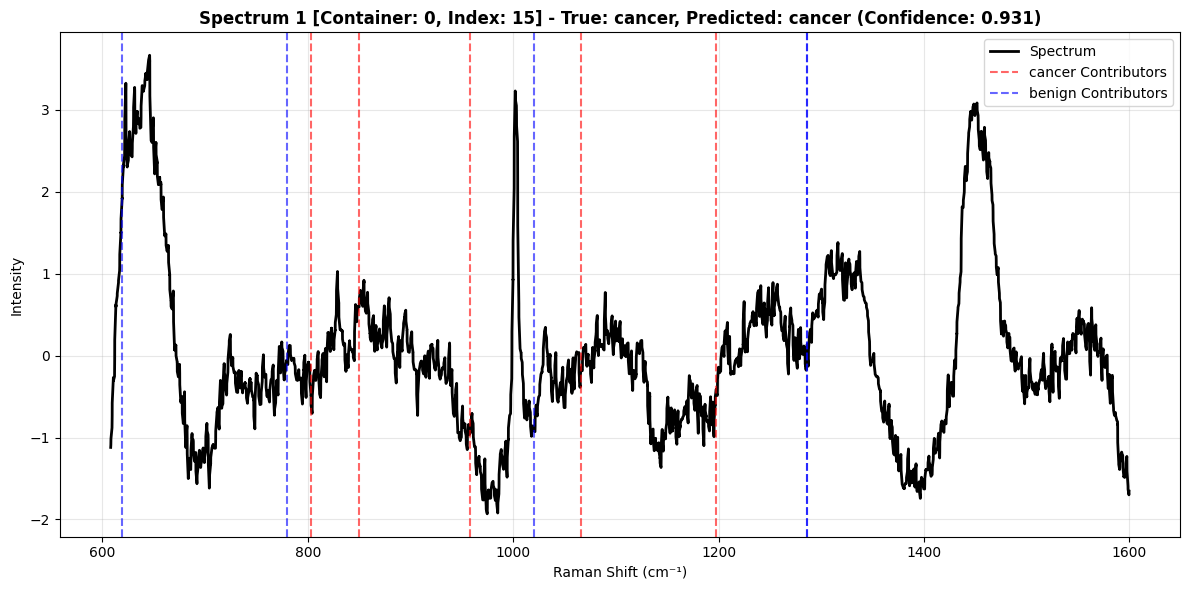

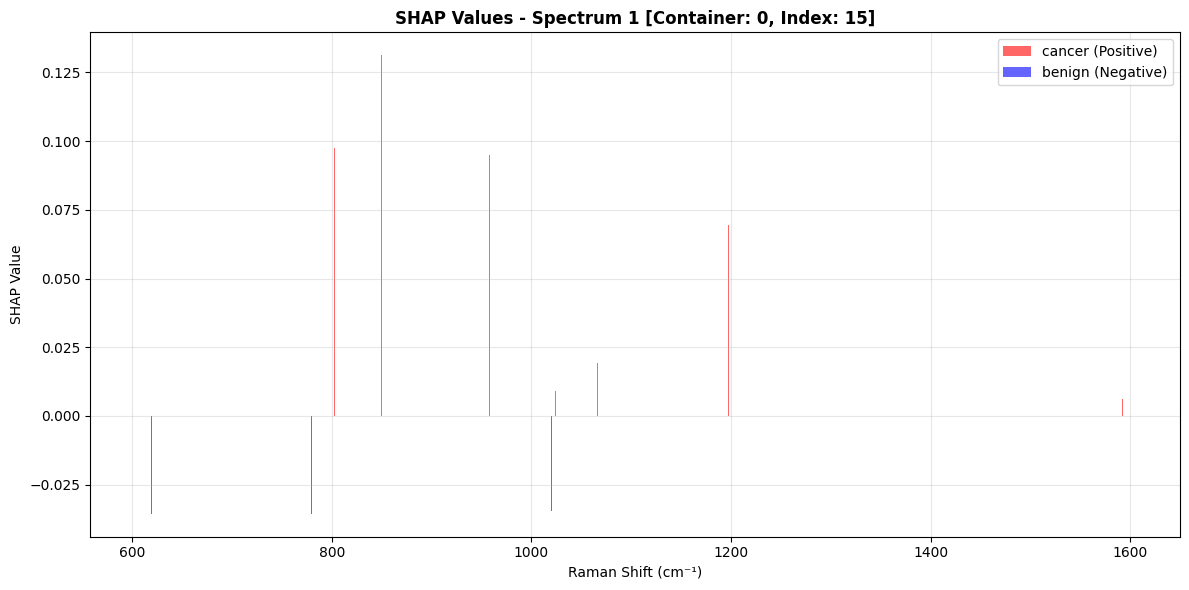

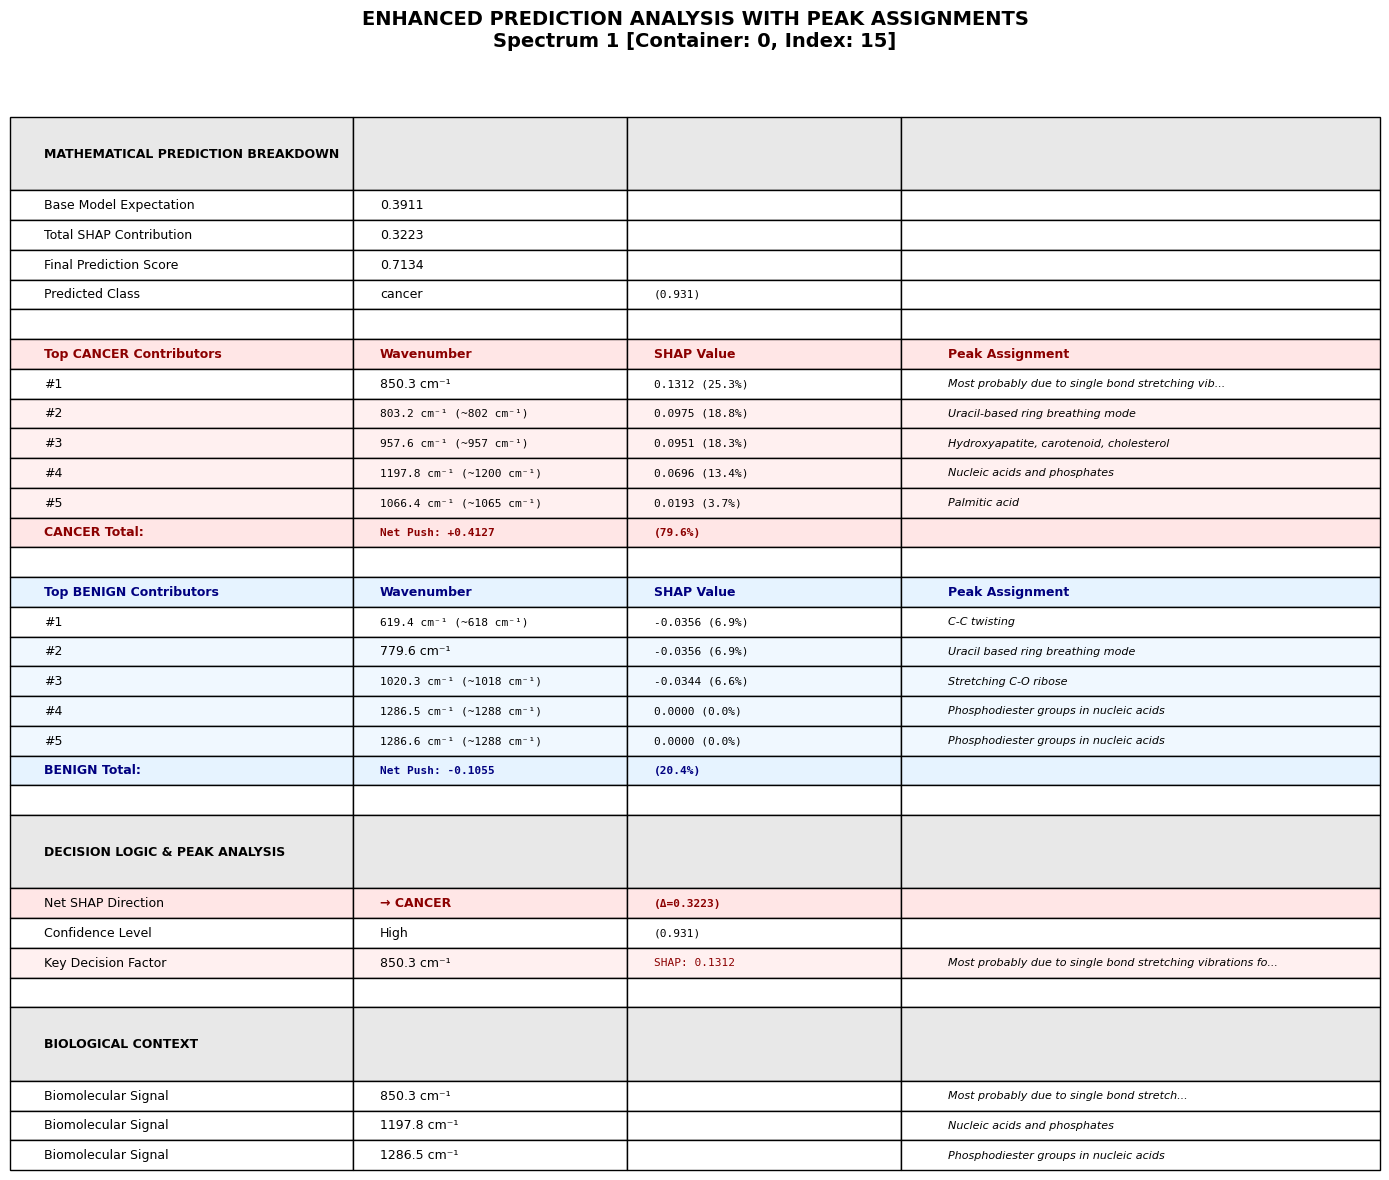

'Spectrum 1 Summary [Container: 0, Index: 15]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.931)'
'  Correct: Yes'
'  Top cancer contributor: 850.3 cm⁻¹ (SHAP: 0.1312)'
'  Top benign contributor: 619.4 cm⁻¹ (SHAP: -0.0356)'
'\nAnalyzing spectrum 2/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
"💡 Performance Tip: You're using 'full' mode for complete SHAP values."
'    This may take longer but gives the most detailed explanations.'
"    Consider using fast_mode=True or shap_output_mode='sparse' for speed."
🔧 Enhanced model type detection...
📋 Detected CalibratedClassifierCV - analyzing base estimator...
⚠️ Could not extract base estimator, using KernelExplainer
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - SHAP strategy: kernel_fallback
   - SHAP model: CalibratedClassifierCV
   - Output mode: full
⚡ Enhanced data optimization...
📊 Optimized data: Back

  0%|          | 0/1 [00:00<?, ?it/s]

📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ Enhanced SHAP explanation completed in 119.18 seconds!'
'    Strategy used: kernel_fallback'
'    Output mode: full'


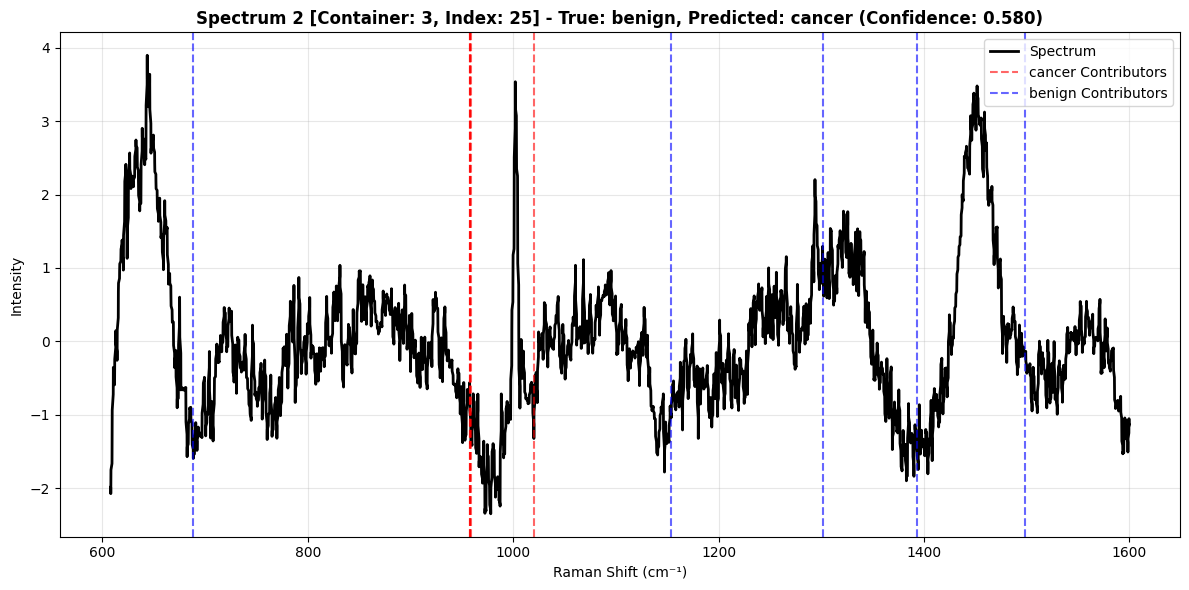

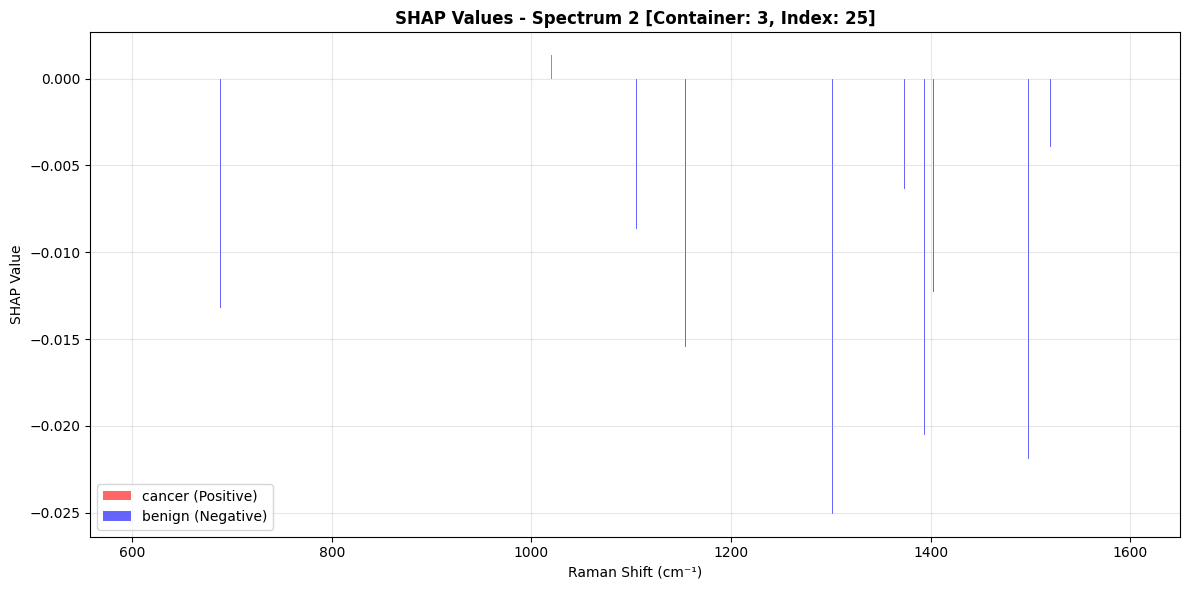

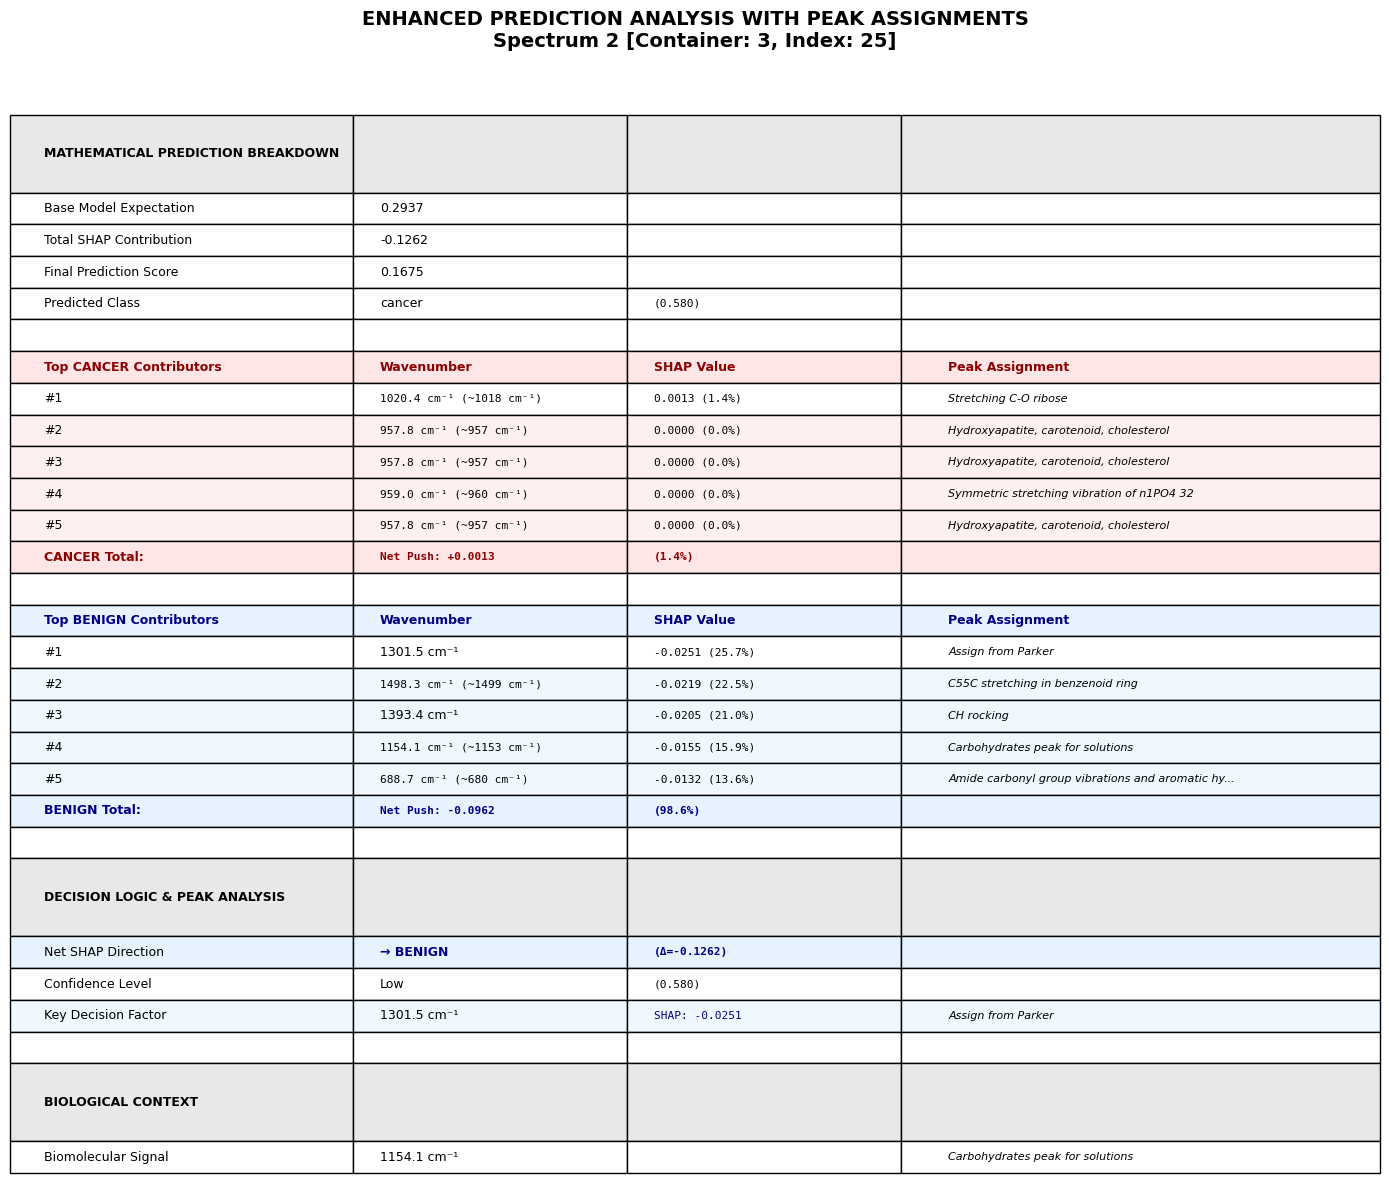

'Spectrum 2 Summary [Container: 3, Index: 25]:'
'  True Label: benign'
'  Predicted: cancer (Confidence: 0.580)'
'  Correct: No'
'  Top cancer contributor: 1020.4 cm⁻¹ (SHAP: 0.0013)'
'  Top benign contributor: 1301.5 cm⁻¹ (SHAP: -0.0251)'
'\nAnalyzing spectrum 3/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
"💡 Performance Tip: You're using 'full' mode for complete SHAP values."
'    This may take longer but gives the most detailed explanations.'
"    Consider using fast_mode=True or shap_output_mode='sparse' for speed."
🔧 Enhanced model type detection...
📋 Detected CalibratedClassifierCV - analyzing base estimator...
⚠️ Could not extract base estimator, using KernelExplainer
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - SHAP strategy: kernel_fallback
   - SHAP model: CalibratedClassifierCV
   - Output mode: full
⚡ Enhanced data optimization...
📊 Optimized data: Bac

  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.179e+00, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.099e+00, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: 

📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ Enhanced SHAP explanation completed in 85.29 seconds!'
'    Strategy used: kernel_fallback'
'    Output mode: full'


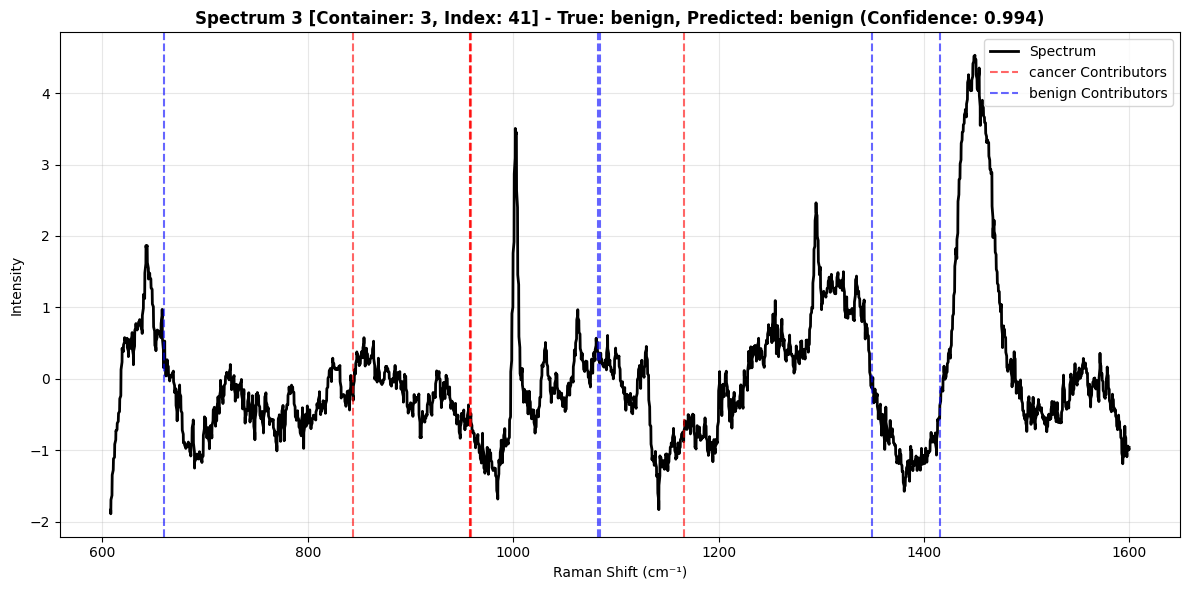

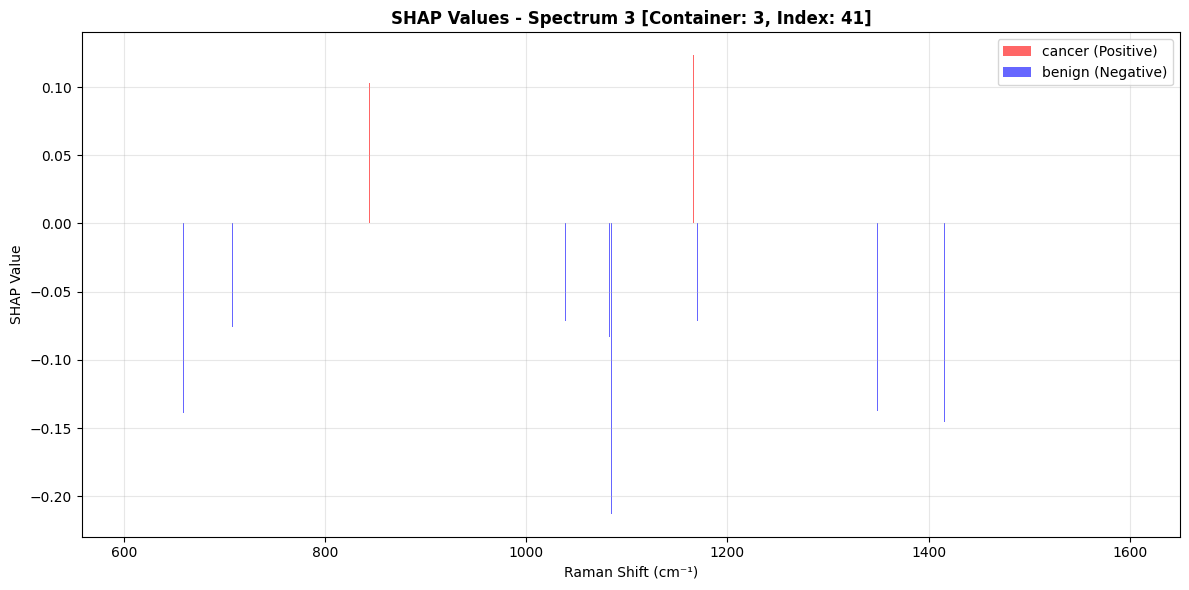

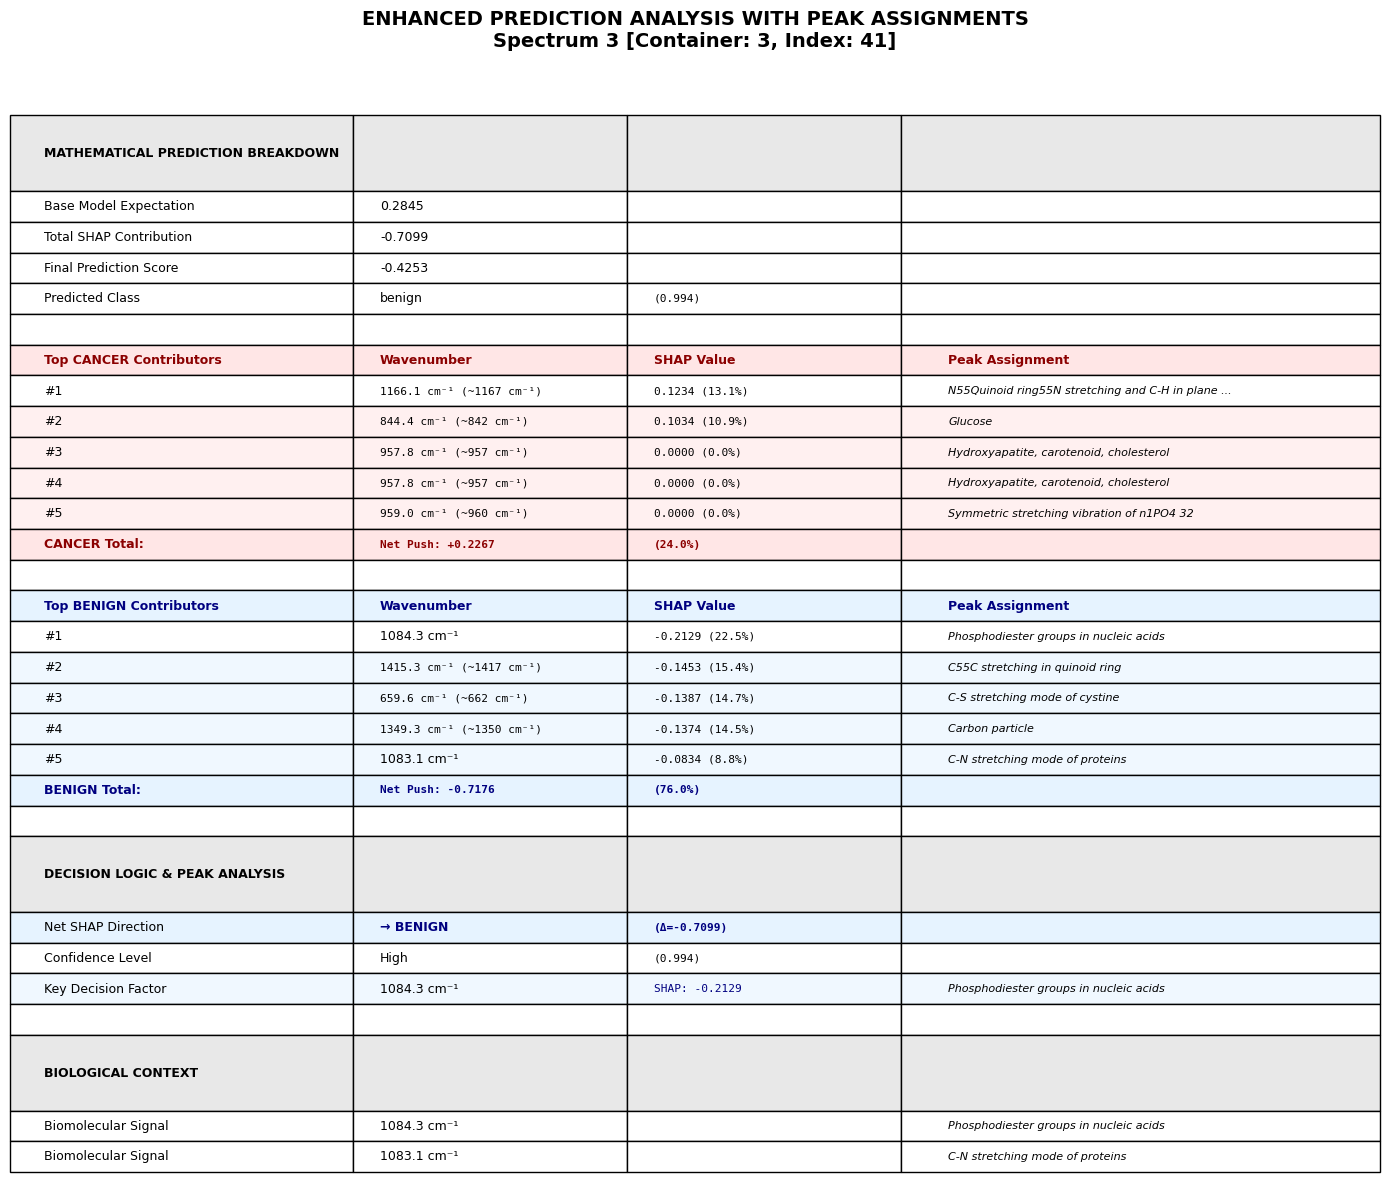

'Spectrum 3 Summary [Container: 3, Index: 41]:'
'  True Label: benign'
'  Predicted: benign (Confidence: 0.994)'
'  Correct: Yes'
'  Top cancer contributor: 1166.1 cm⁻¹ (SHAP: 0.1234)'
'  Top benign contributor: 1084.3 cm⁻¹ (SHAP: -0.2129)'
'\nAnalyzing spectrum 4/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
"💡 Performance Tip: You're using 'full' mode for complete SHAP values."
'    This may take longer but gives the most detailed explanations.'
"    Consider using fast_mode=True or shap_output_mode='sparse' for speed."
🔧 Enhanced model type detection...
📋 Detected CalibratedClassifierCV - analyzing base estimator...
⚠️ Could not extract base estimator, using KernelExplainer
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - SHAP strategy: kernel_fallback
   - SHAP model: CalibratedClassifierCV
   - Output mode: full
⚡ Enhanced data optimization...
📊 Optimized data: Ba

  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(


📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ Enhanced SHAP explanation completed in 69.09 seconds!'
'    Strategy used: kernel_fallback'
'    Output mode: full'


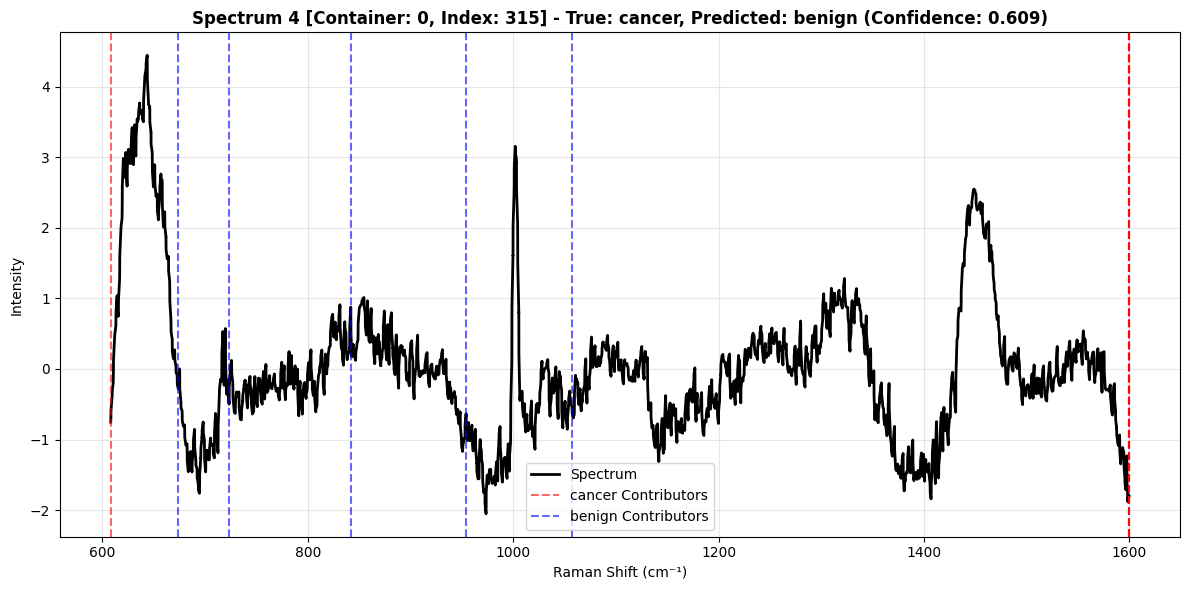

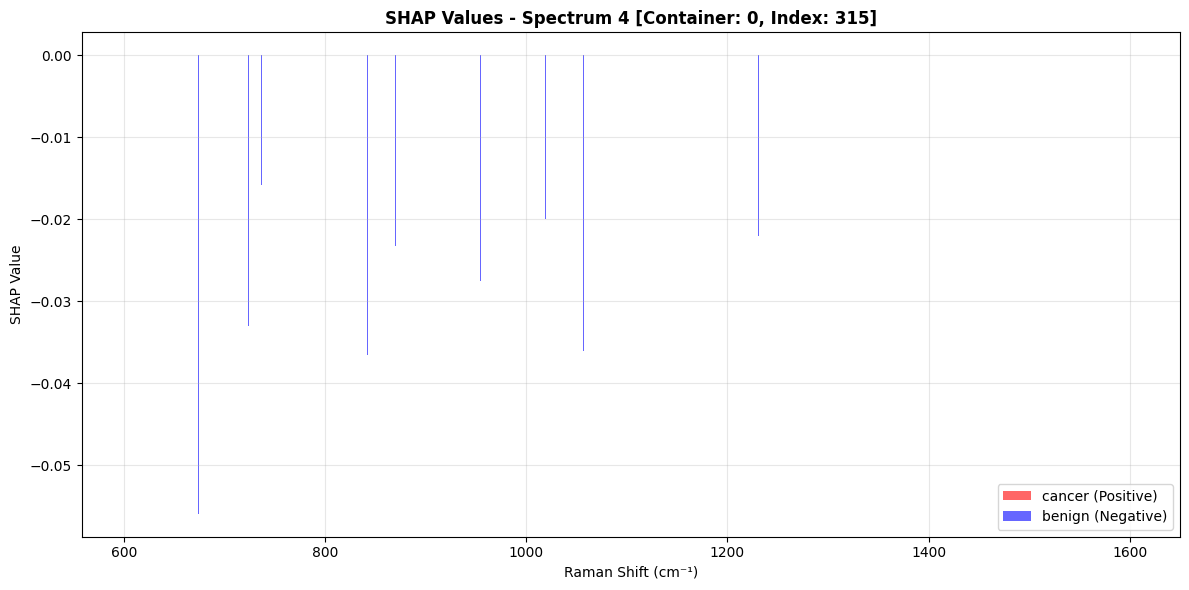

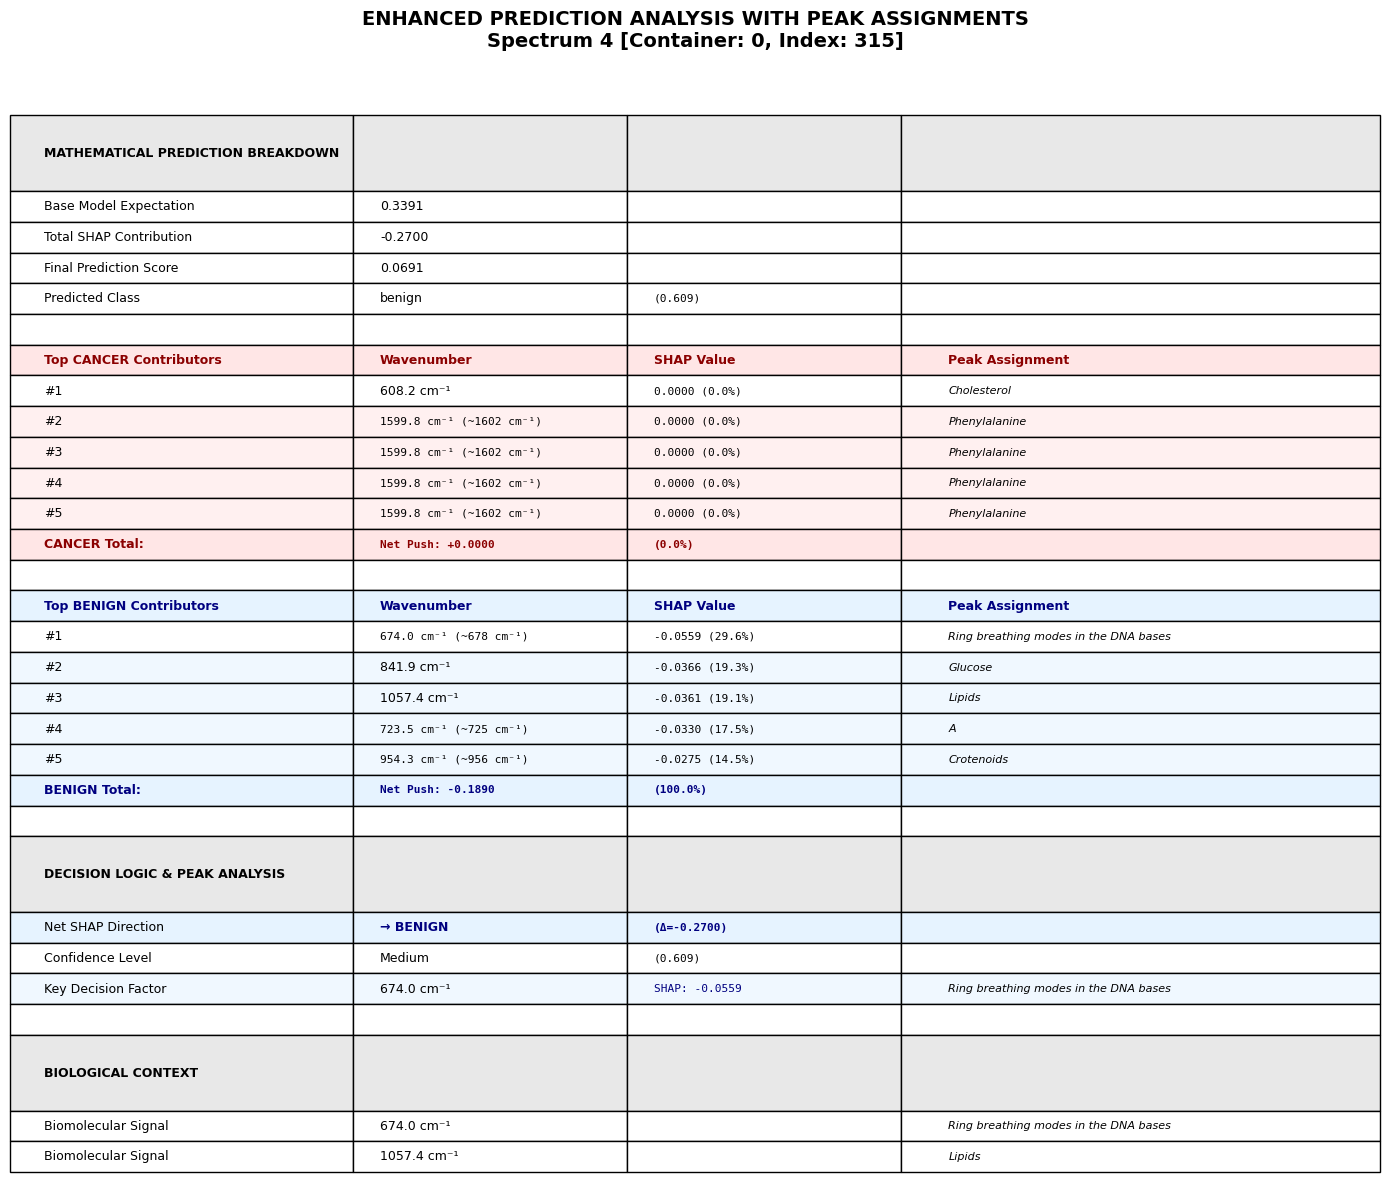

'Spectrum 4 Summary [Container: 0, Index: 315]:'
'  True Label: cancer'
'  Predicted: benign (Confidence: 0.609)'
'  Correct: No'
'  Top cancer contributor: 608.2 cm⁻¹ (SHAP: 0.0000)'
'  Top benign contributor: 674.0 cm⁻¹ (SHAP: -0.0559)'


In [10]:

# if len(sample_indices) == 0:
#     for key, value in predict_data["prediction_breakdown"].items():
#         try:
#             if len(value) > 0:
#                 sample_indices.append(value[random.randint(0, len(value))][0])
#         except Exception as e:
#             console_log(f"Error processing value for key {key}: {e}")

console_log(f"Sample indices for inspection: {sample_indices}")
inspect_spectra = visual_cccv_svc_linear.inspect_spectra(test_spectra=test_spectra,
                                         true_labels=true_labels,
                                         n_samples=1,
                                         positive_label=labels[1],
                                         negative_label=labels[0],
                                         show_lime_plots=False,
                                         sample_indices=sample_indices,
                                                         # Force full SHAP values:
                                                         shap_output_mode="full",           # Key setting!
                                                         force_kernel_explainer=True,       # Forces KernelExplainer
                                                         kernel_nsamples_multiplier=2.0     # Better quality
                                         )

### TESTING WITH SVC LINEAR MODEL (IModPoly)

In [7]:
svc_linear_path = os.path.join(
    CURRENT_DIR,
    "models",
    "SVC-LINEAR",
    "SVC-LINEAR_raman_prostate_model"
)

svc_linear_model = MLModel(
    onnx_path=f"{svc_linear_path}.onnx",
    meta_path=f"{svc_linear_path}.json",
    pickle_path=f"{svc_linear_path}.pkl",
    region=region
)

2025-06-12 04:32:03,692 - load_onnx - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model.onnx and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model.json
2025-06-12 04:32:03,984 - pickle_load - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model.pkl and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model.json


In [8]:
svc_linear_get_predictions = svc_linear_model.predict(
    test_spectra=test_spectra,
    true_labels=true_labels,
    use_onnx=False,
)

'Interpolating spectra from 41145 to 24552 features'
'Interpolating spectra from 40380 to 24552 features'
'Interpolating spectra from 4475 to 24552 features'
'Interpolating spectra from 5370 to 24552 features'
'Predicting all 2736 samples'
'Predicting 2736 samples with 24552 features using sklearn'


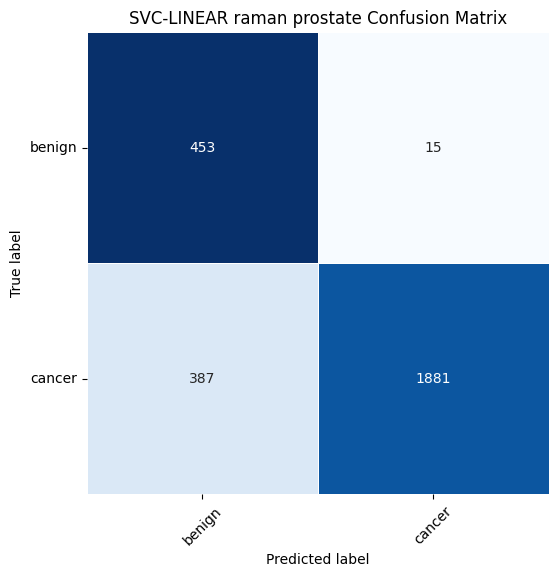

'Predict Accuracy:'
'====================================='
'benign: 96.79%'
'cancer: 82.94%'


In [12]:
visual_svc_linear = RamanVisualizer(ML_PROPERTY=svc_linear_model)
predict_accuracy, plotdata = visual_svc_linear.confusion_matrix_heatmap(
    y_true=svc_linear_model.y_true,          # true labels for test set
    y_pred=svc_linear_model.y_pred,  # predicted labels for test set
    class_labels=labels,    # class names, e.g. ["benign", "cancer"]
    title=f"{svc_linear_model._name} Confusion Matrix",
    normalize=False,
    cmap="Blues",
    figsize=(8, 6),
    fmt="d",
)

console_log("Predict Accuracy:")
console_log("=====================================")
for i, (label, percentage) in enumerate(predict_accuracy.items()):
    console_log(f"{label}: {percentage:.2f}%")

'Sample indices for inspection: [15, 2565, 2581, 315]'
'Using MLModel with model type: SVC'
'📊 Using provided test_spectra and true_labels'
'Inspecting 4 spectra...'
'\nAnalyzing spectrum 1/4...'
'Using existing training data with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
🔧 Enhanced model type detection...
📏 Strategy: Native LinearExplainer
📊 Model Analysis:
   - Original model: SVC
   - SHAP strategy: linear_native
   - SHAP model: SVC
   - Output mode: auto
⚡ Enhanced data optimization...
⚡ Sparse mode: Using base estimator for speed
📊 Optimized data: Background=50, Test=1, Features=24552
'🔬 Computing SHAP values using strategy: linear_native'
'    Test samples: 1'
'    Background samples: 50'
🔬 Creating enhanced SHAP explainer...
📏 Using native LinearExplainer on Linear SVC
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ Enhanced SHAP explanation comple

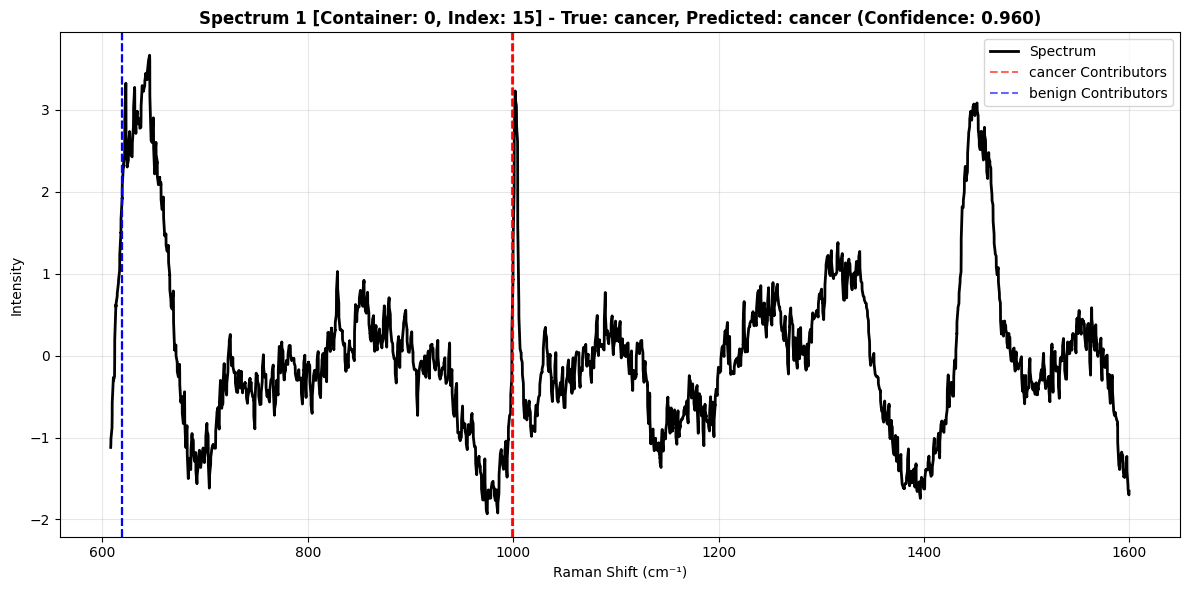

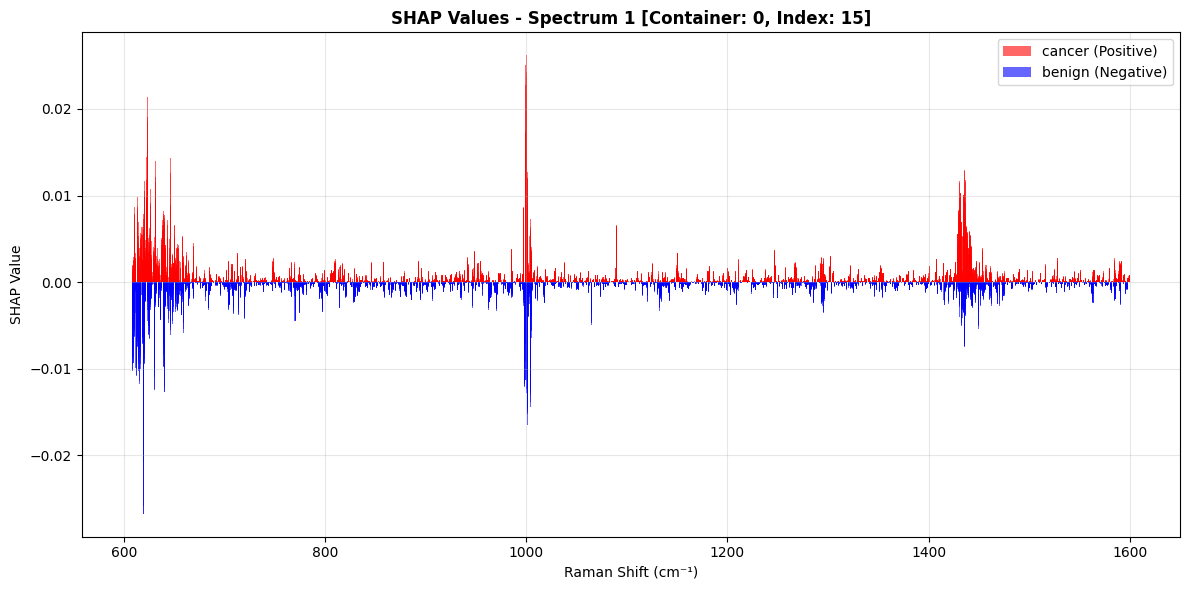

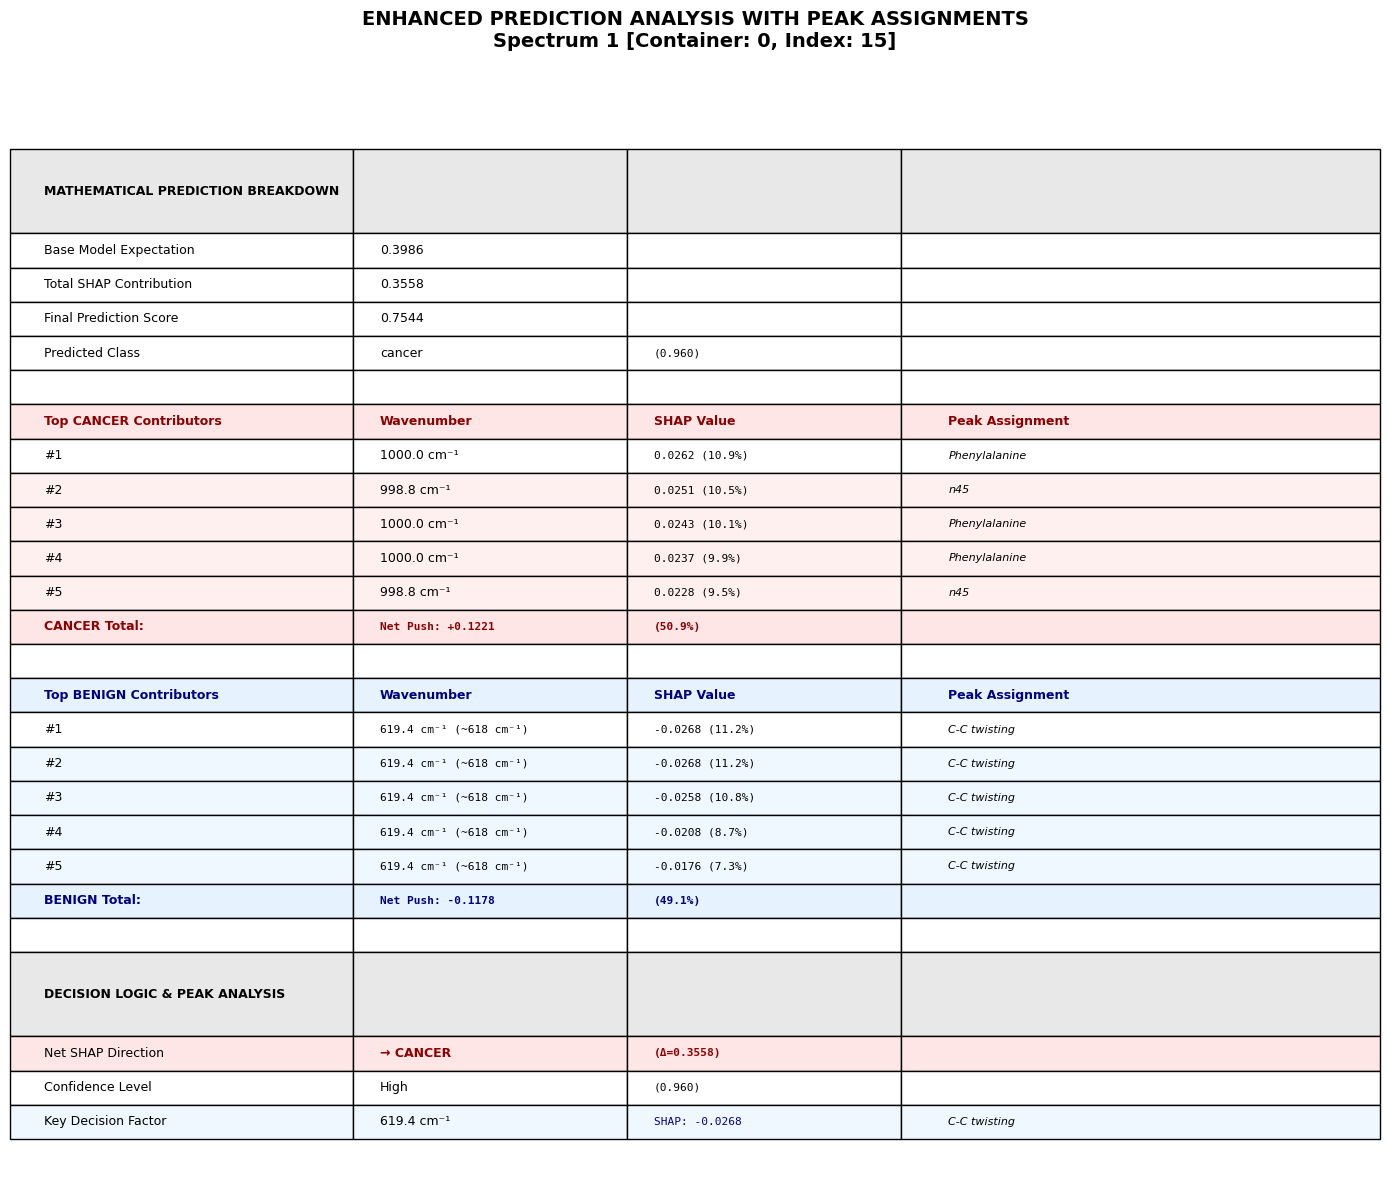

'Spectrum 1 Summary [Container: 0, Index: 15]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.960)'
'  Correct: Yes'
'  Top cancer contributor: 1000.0 cm⁻¹ (SHAP: 0.0262)'
'  Top benign contributor: 619.4 cm⁻¹ (SHAP: -0.0268)'
'\nAnalyzing spectrum 2/4...'
'Using existing training data with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
🔧 Enhanced model type detection...
📏 Strategy: Native LinearExplainer
📊 Model Analysis:
   - Original model: SVC
   - SHAP strategy: linear_native
   - SHAP model: SVC
   - Output mode: auto
⚡ Enhanced data optimization...
⚡ Sparse mode: Using base estimator for speed
📊 Optimized data: Background=50, Test=1, Features=24552
'🔬 Computing SHAP values using strategy: linear_native'
'    Test samples: 1'
'    Background samples: 50'
🔬 Creating enhanced SHAP explainer...
📏 Using native LinearExplainer on Linear SVC
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top fe

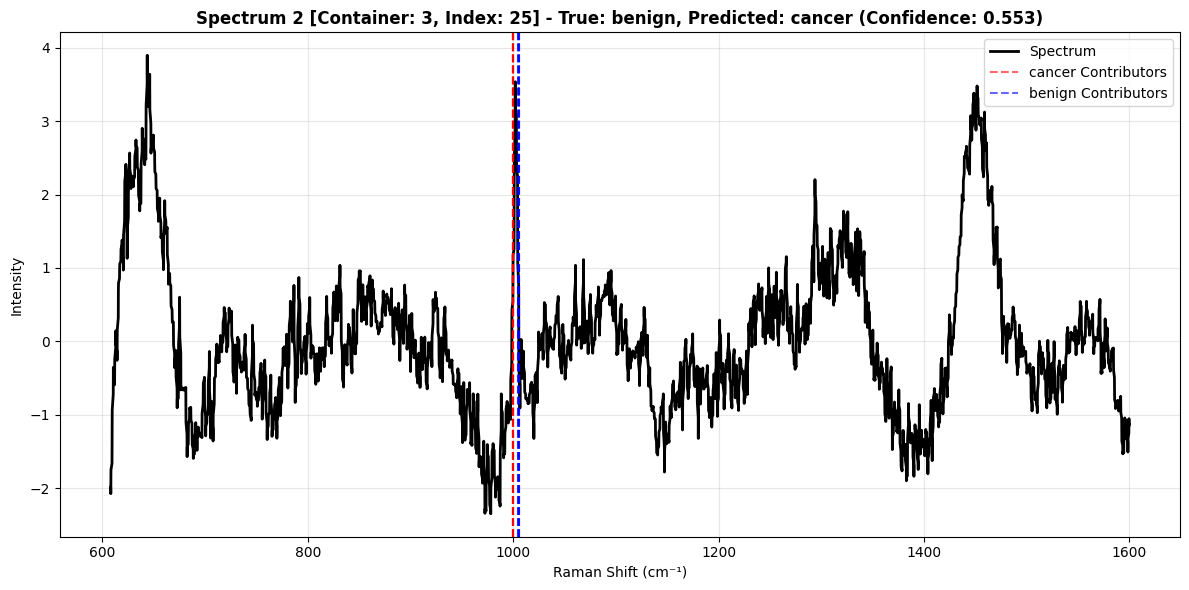

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


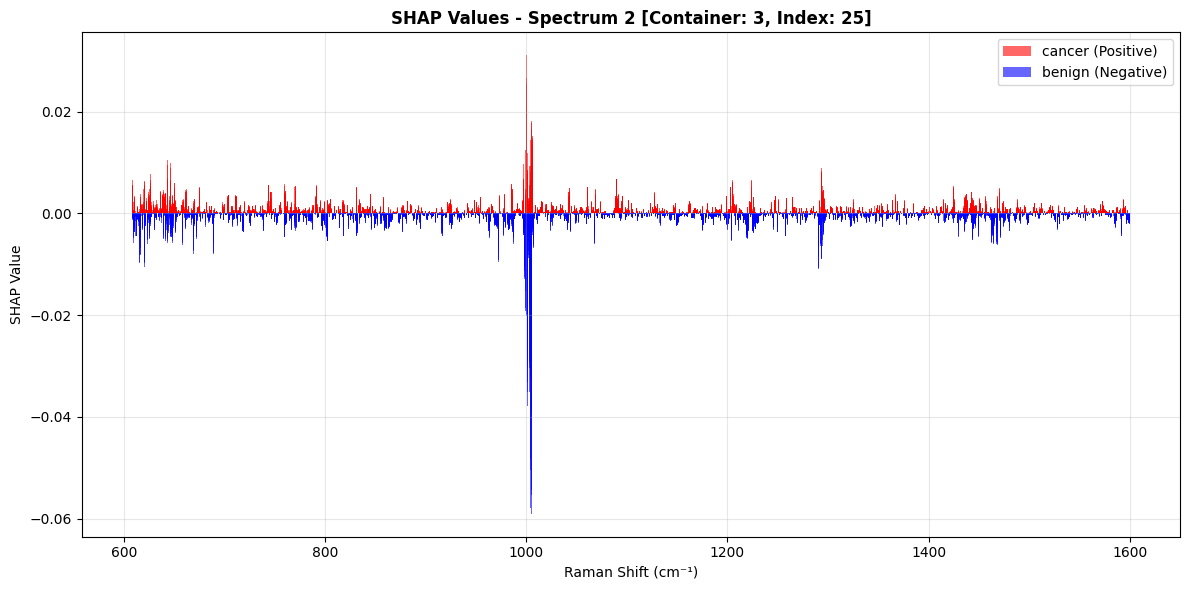

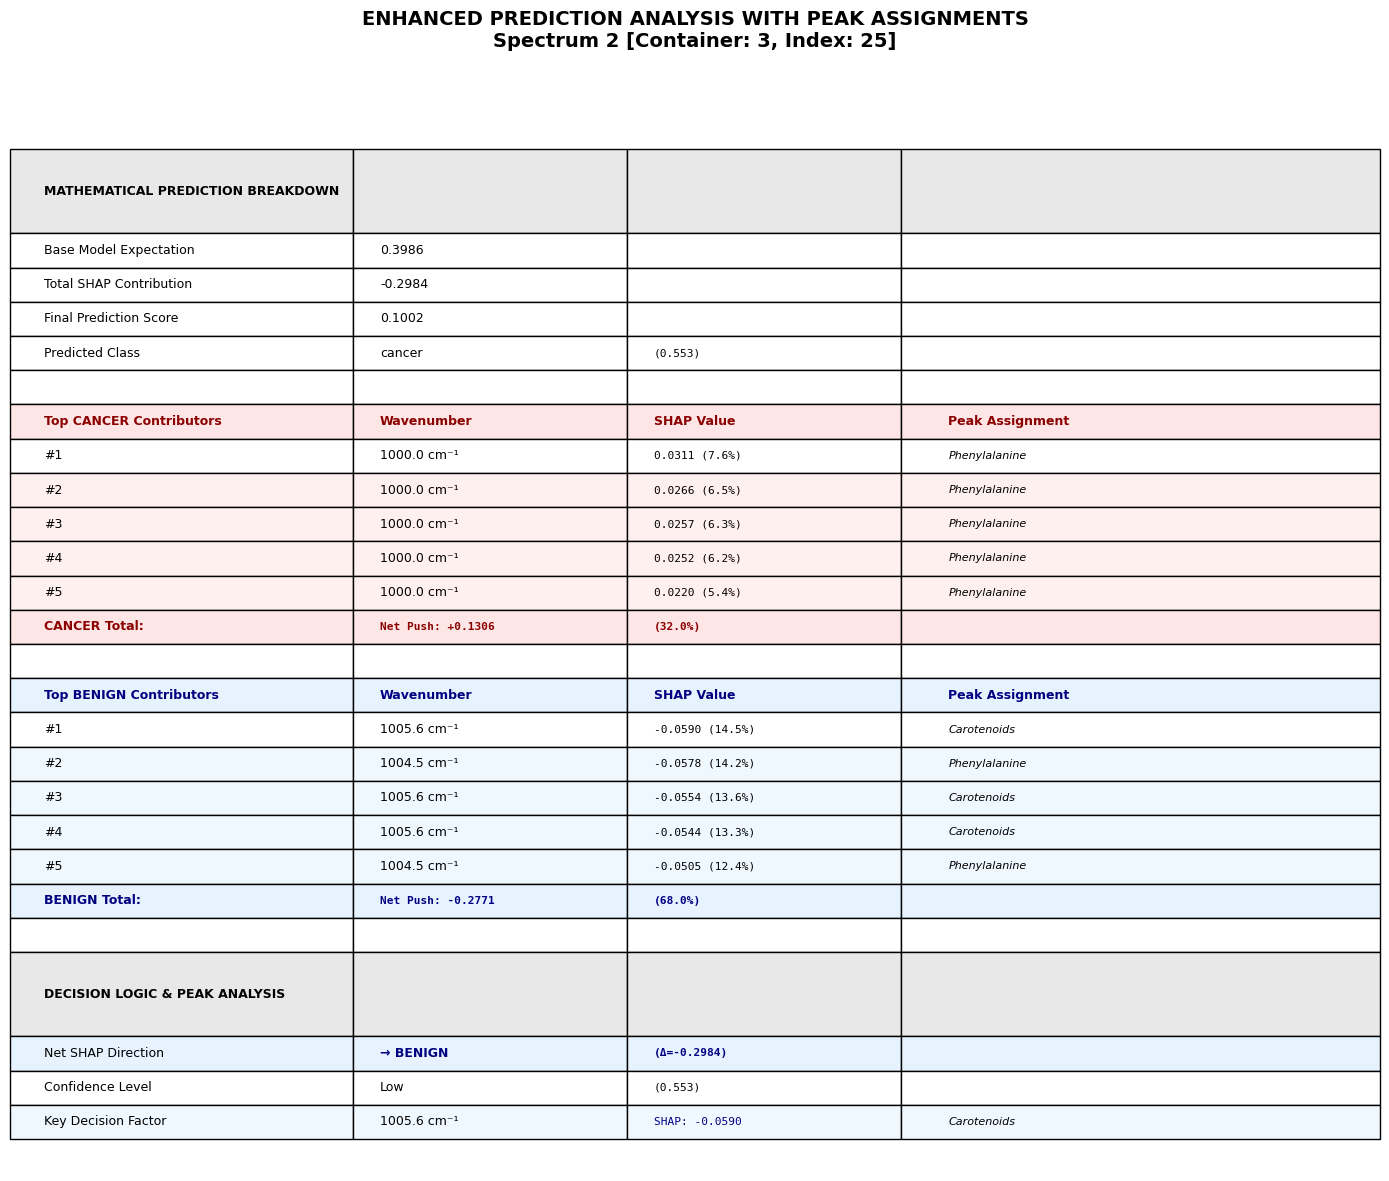

'Spectrum 2 Summary [Container: 3, Index: 25]:'
'  True Label: benign'
'  Predicted: cancer (Confidence: 0.553)'
'  Correct: No'
'  Top cancer contributor: 1000.0 cm⁻¹ (SHAP: 0.0311)'
'  Top benign contributor: 1005.6 cm⁻¹ (SHAP: -0.0590)'
'\nAnalyzing spectrum 3/4...'
'Using existing training data with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
🔧 Enhanced model type detection...
📏 Strategy: Native LinearExplainer
📊 Model Analysis:
   - Original model: SVC
   - SHAP strategy: linear_native
   - SHAP model: SVC
   - Output mode: auto
⚡ Enhanced data optimization...
⚡ Sparse mode: Using base estimator for speed
📊 Optimized data: Background=50, Test=1, Features=24552
'🔬 Computing SHAP values using strategy: linear_native'
'    Test samples: 1'
'    Background samples: 50'
🔬 Creating enhanced SHAP explainer...
📏 Using native LinearExplainer on Linear SVC
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top fe

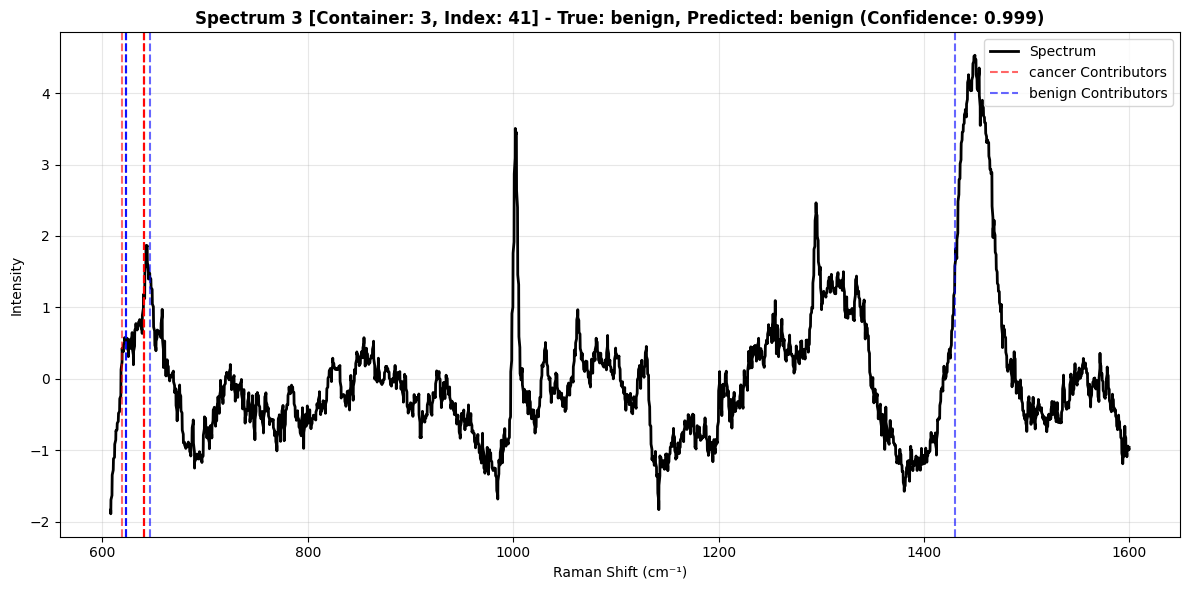

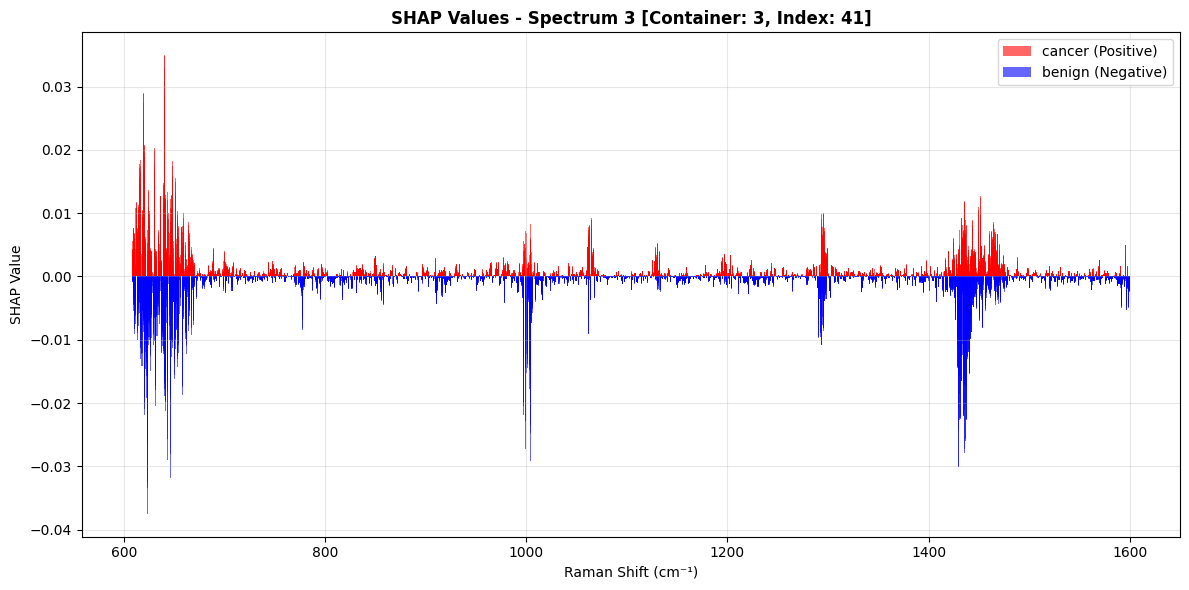

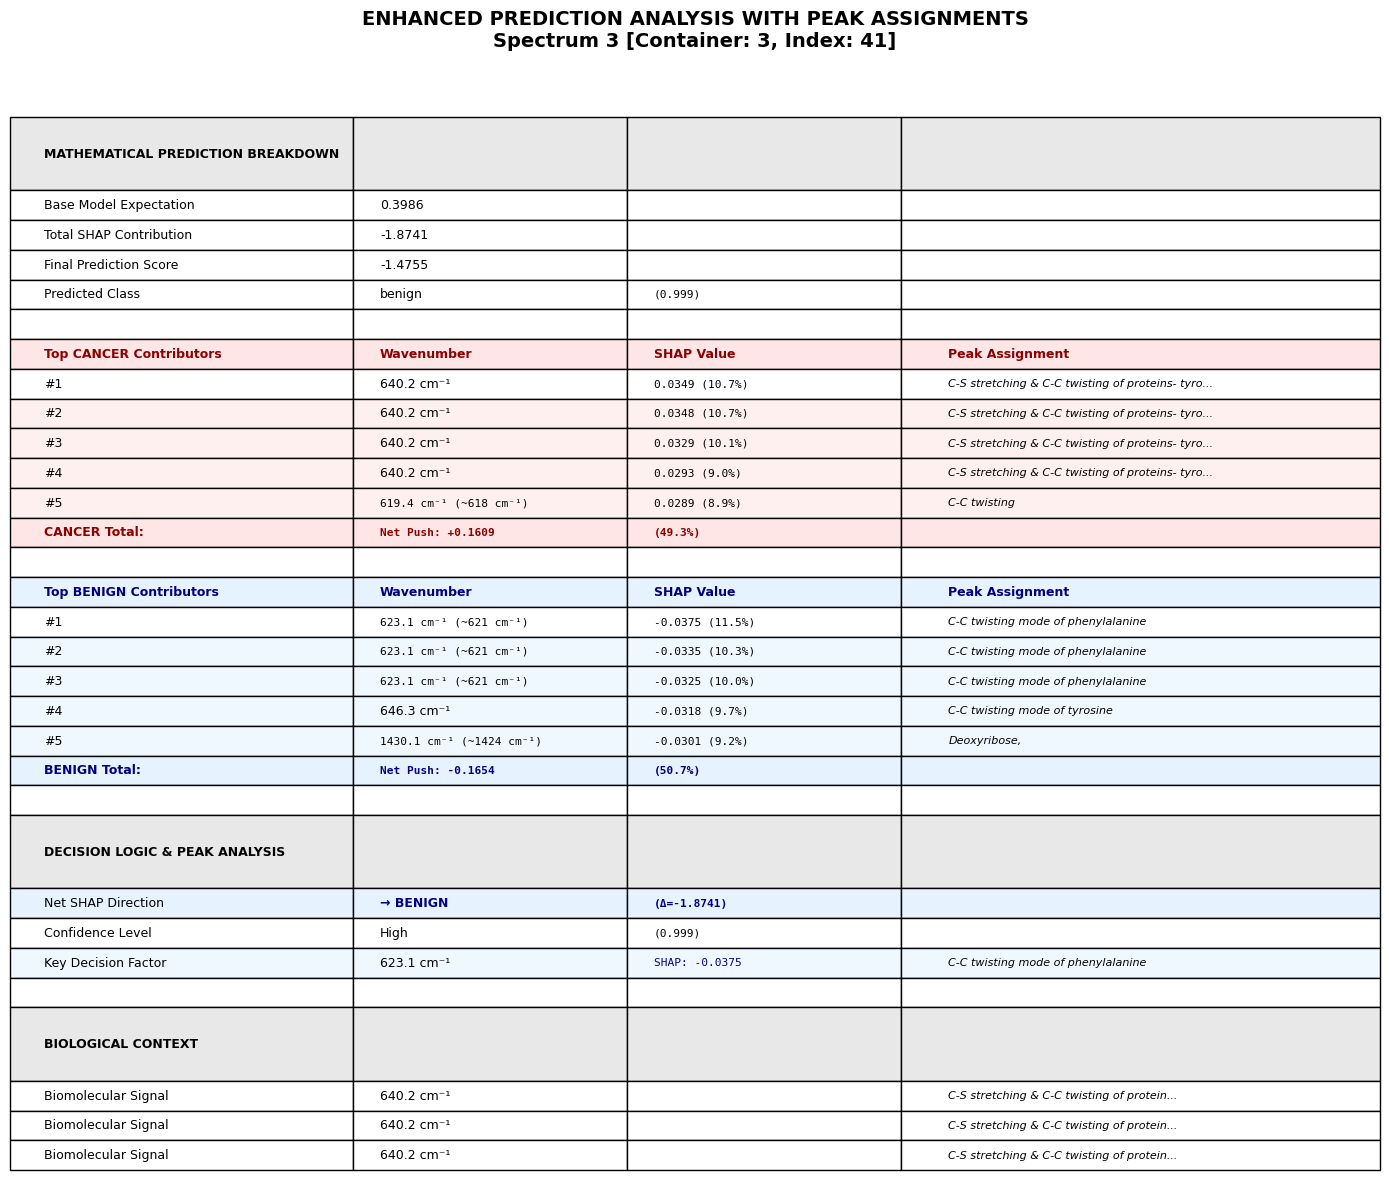

'Spectrum 3 Summary [Container: 3, Index: 41]:'
'  True Label: benign'
'  Predicted: benign (Confidence: 0.999)'
'  Correct: Yes'
'  Top cancer contributor: 640.2 cm⁻¹ (SHAP: 0.0349)'
'  Top benign contributor: 623.1 cm⁻¹ (SHAP: -0.0375)'
'\nAnalyzing spectrum 4/4...'
'Using existing training data with 50 samples for SHAP background'
'🚀 Starting enhanced SHAP explanation analysis...'
🔧 Enhanced model type detection...
📏 Strategy: Native LinearExplainer
📊 Model Analysis:
   - Original model: SVC
   - SHAP strategy: linear_native
   - SHAP model: SVC
   - Output mode: auto
⚡ Enhanced data optimization...
⚡ Sparse mode: Using base estimator for speed
📊 Optimized data: Background=50, Test=1, Features=24552
'🔬 Computing SHAP values using strategy: linear_native'
'    Test samples: 1'
'    Background samples: 50'
🔬 Creating enhanced SHAP explainer...
📏 Using native LinearExplainer on Linear SVC
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top fea

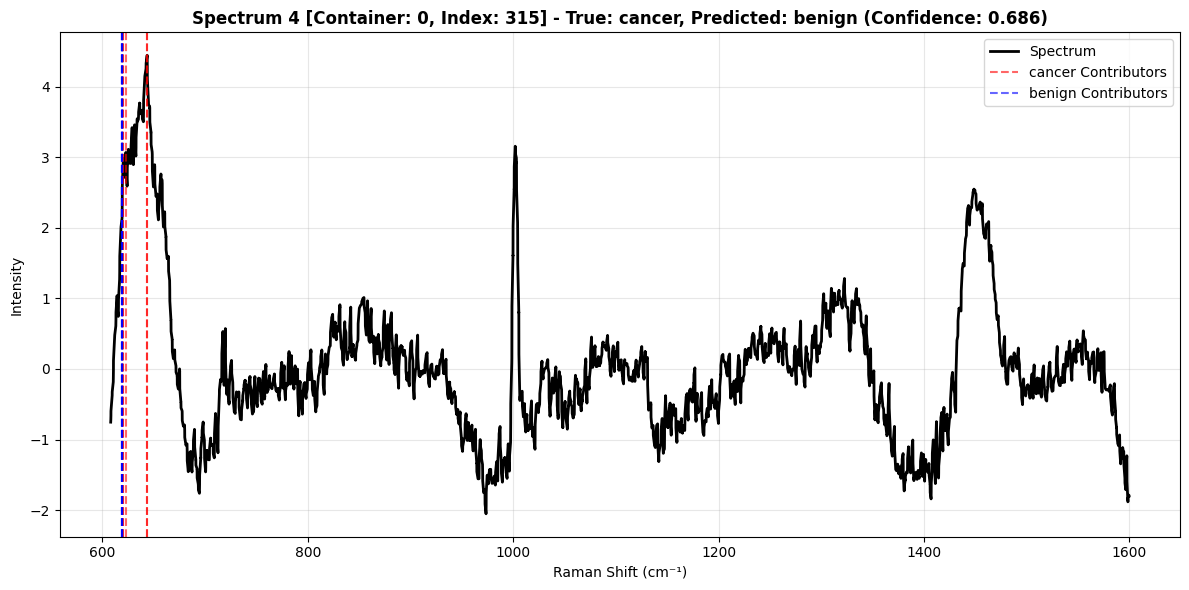

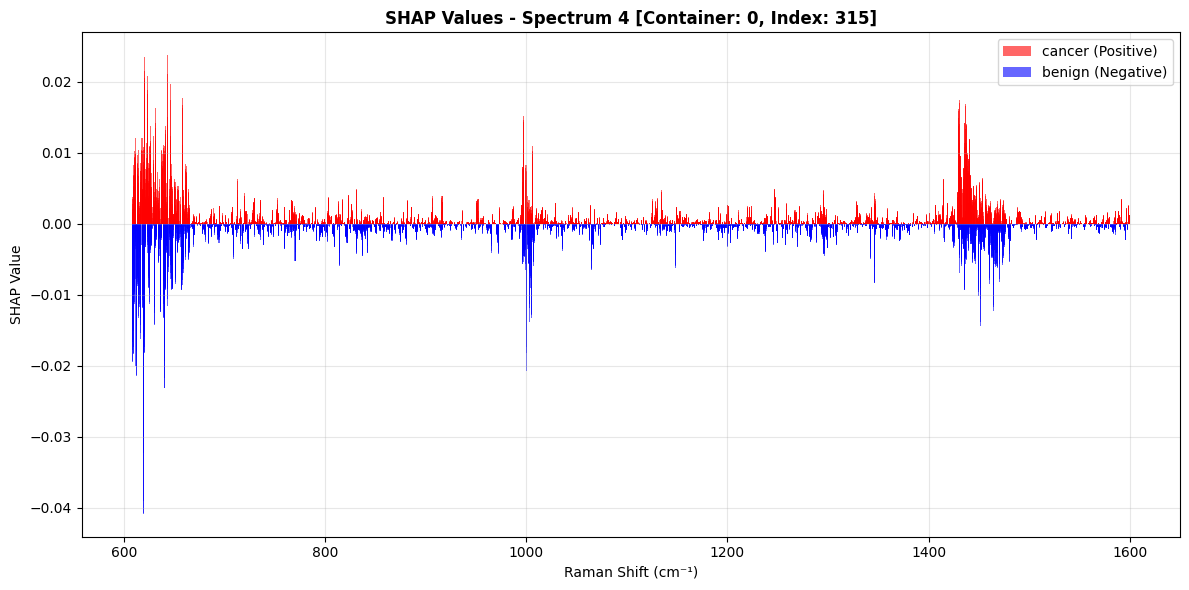

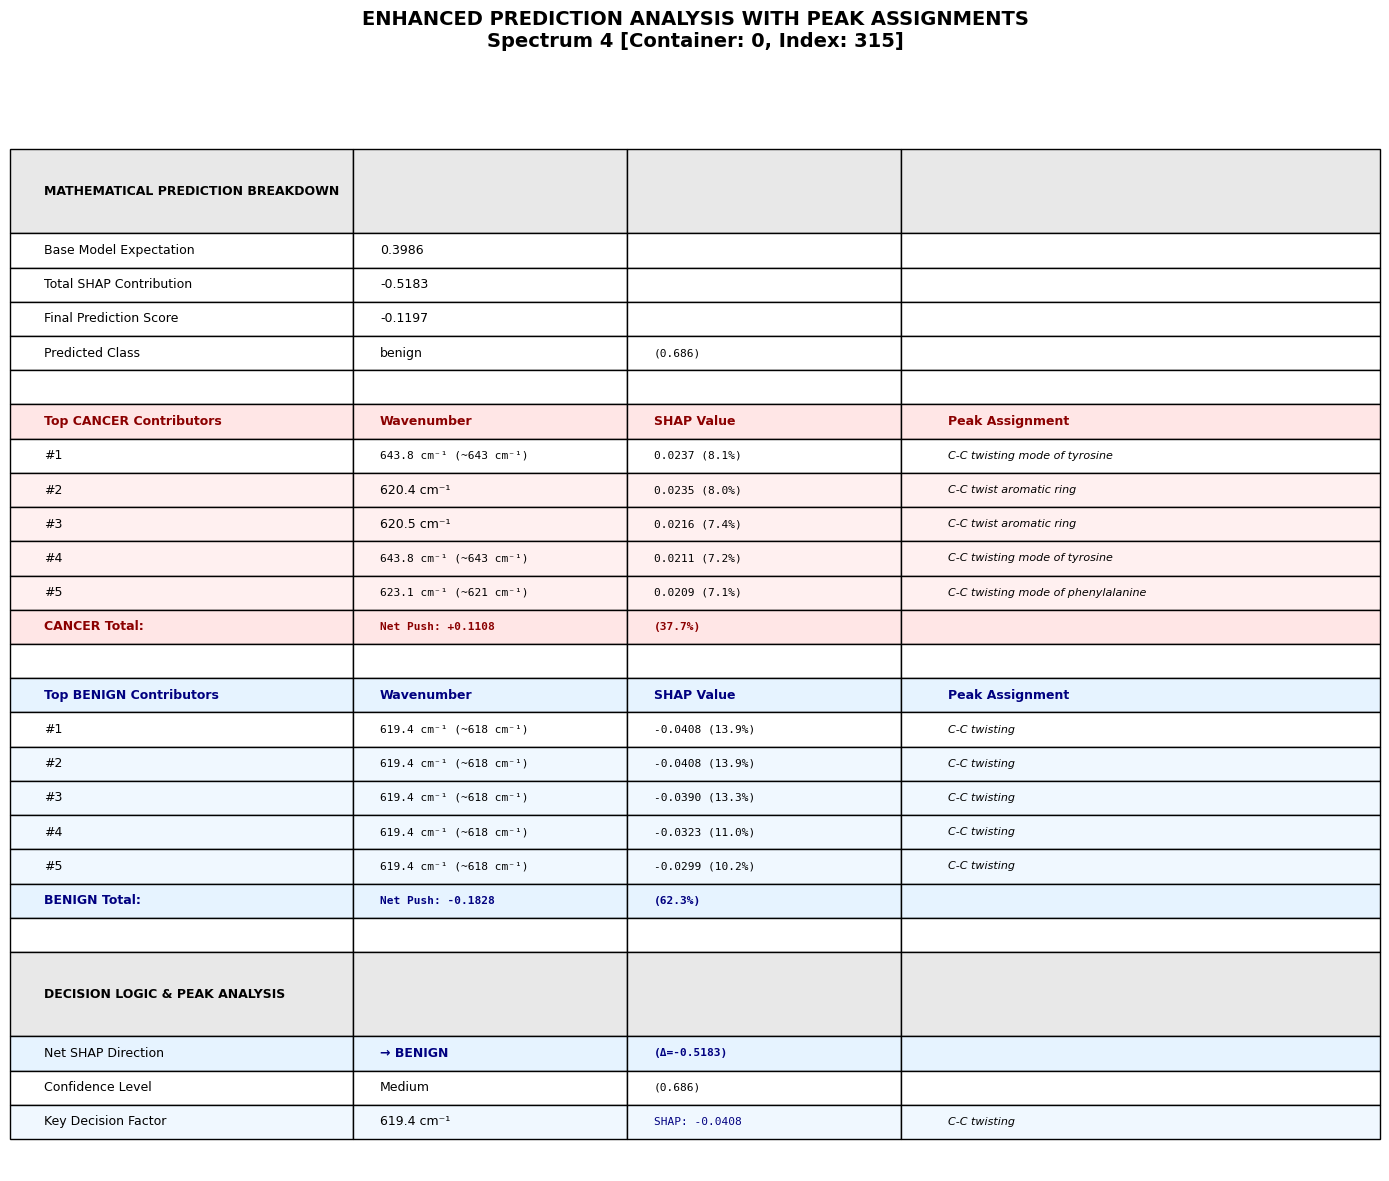

'Spectrum 4 Summary [Container: 0, Index: 315]:'
'  True Label: cancer'
'  Predicted: benign (Confidence: 0.686)'
'  Correct: No'
'  Top cancer contributor: 643.8 cm⁻¹ (SHAP: 0.0237)'
'  Top benign contributor: 619.4 cm⁻¹ (SHAP: -0.0408)'


In [11]:
console_log(f"Sample indices for inspection: {sample_indices}")
inspect_spectra = visual_svc_linear.inspect_spectra(test_spectra=test_spectra,
                                                         true_labels=true_labels,
                                                         n_samples=1,
                                                         positive_label=labels[1],
                                                         negative_label=labels[0],
                                                         show_lime_plots=False,
                                                         sample_indices=sample_indices,
                                                         )